# Read a PRISM file

In [1]:
import s3fs
import rioxarray
from os import path
import matplotlib.pyplot as plt

In [2]:
# print prism folders
s3 = s3fs.S3FileSystem(anon=False)
prism = s3.ls('bioscape-data/PRISM/L2')
# print first few
prism[:10]

['bioscape-data/PRISM/L2/prm20231022t141344_rfl_ort',
 'bioscape-data/PRISM/L2/prm20231022t141344_rfl_ort.hdr',
 'bioscape-data/PRISM/L2/prm20231025t060817_rfl_ort',
 'bioscape-data/PRISM/L2/prm20231025t060817_rfl_ort.hdr',
 'bioscape-data/PRISM/L2/prm20231025t062740_rfl_ort',
 'bioscape-data/PRISM/L2/prm20231025t062740_rfl_ort.hdr',
 'bioscape-data/PRISM/L2/prm20231025t063541_rfl_ort',
 'bioscape-data/PRISM/L2/prm20231025t063541_rfl_ort.hdr',
 'bioscape-data/PRISM/L2/prm20231025t064655_rfl_ort',
 'bioscape-data/PRISM/L2/prm20231025t064655_rfl_ort.hdr']

In [3]:
# read a RFL file
prismrfl = rioxarray.open_rasterio(path.join('s3://', prism[0]), 
                                   driver='ENVI', chuncks=True, parse_coordinates=True)
prismrfl

<xarray.DataArray (band: 246, y: 6449, x: 918)> Size: 6GB
[1456364772 values with dtype=float32]
Coordinates:
    fwhm         (band) float64 2kB 3.332 3.332 3.332 ... 3.327 3.314 3.326
    wavelength   (band) float64 2kB 350.6 353.4 356.2 ... 1.043e+03 1.046e+03
  * band         (band) int64 2kB 1 2 3 4 5 6 7 ... 240 241 242 243 244 245 246
    xc           (y, x) float64 47MB 3.306e+05 3.306e+05 ... 3.261e+05 3.261e+05
    yc           (y, x) float64 47MB 6.24e+06 6.24e+06 ... 6.208e+06 6.208e+06
    spatial_ref  int64 8B 0
Dimensions without coordinates: y, x
Attributes: (12/263)
    Band_1:             350.5548293 Nanometers
    Band_10:            376.02916400000004 Nanometers
    Band_100:           631.0230608 Nanometers
    Band_101:           633.8588853 Nanometers
    Band_102:           636.6947659 Nanometers
    Band_103:           639.5307029 Nanometers
    ...                 ...
    file_type:          ENVI
    header_offset:      0
    interleave:         bil
    lines:              6449
    samples:            918
    smoothing_factors:   1.0 , 1.0 , 1.0 , 1.0 , 1.0 , 1.0 , 1.0 , 1.0 , 1.0 ...

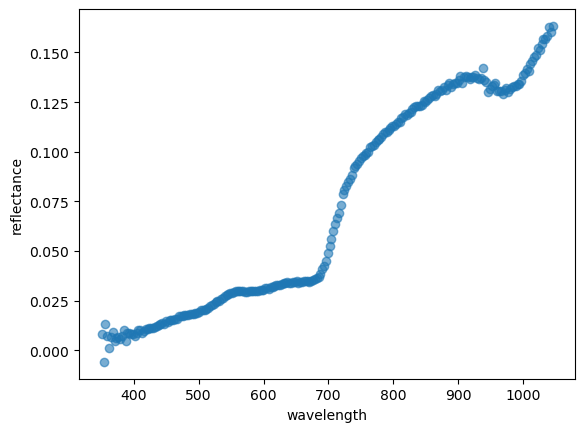

In [4]:
# plot spectra from a pixel
rfl_meas = prismrfl.isel(y=300, x=300).values
wl = prismrfl.wavelength.values
plt.scatter(wl, rfl_meas, alpha=0.6)
plt.xlabel("wavelength")
plt.ylabel("reflectance")
plt.show()